# <span style="color:black;">Importation des Bibliothèques et Préparation des Outils pour l'Analyse
</span>


In [6]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from imblearn.over_sampling import SMOTE

# <span style="color:black;">Préparation et Prétraitement des Données pour la Détection de Fraude
</span>


## <span style="color:black;">Chargement des datasets</span>


In [2]:
# Chargement des datasets
df_train = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTrain.csv')
df_test = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTest.csv')

## <span style="color:black;">Suppression des colonnes inutiles</span>


In [3]:
# Suppression des colonnes inutiles
df_train.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)
df_test.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)

## <span style="color:black;">Conversion et Encodage des Colonnes</span>


In [4]:
# Conversion des colonnes de dates en timestamps
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time']).apply(lambda x: x.timestamp())
df_train['dob'] = pd.to_datetime(df_train['dob']).apply(lambda x: x.timestamp())

In [7]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = [ 'category', 'city', 'state','dob']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    df_train[col] = encoder.fit_transform(df_train[col])

In [8]:
# List of columns to encode
columns_to_encode = ['category', 'city', 'state','dob']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    df_test[col] = encoder.fit_transform(df_test[col])

In [9]:
# The rest of your numeric columns should already be in the correct format
df_test ['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test ['trans_date_trans_time'] = df_test ['trans_date_trans_time'].apply(lambda x: x.timestamp())

## <span style="color:black;">Séparation des features et de la target</span>


In [10]:
# Séparation des features et de la target
X = df_train .drop(columns=['is_fraud'])
Y = df_train ['is_fraud']

In [13]:
X_train = df_train.drop('is_fraud', axis=1)
y_train = df_train['is_fraud']

X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']


## <span style="color:black;">Normalisation des features</span>


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## <span style="color:black;">Reshape des données pour RNN</span>


In [15]:
# Reshape des données pour RNN (n_samples, timesteps, n_features)
# Ici, timesteps = 1 et n_features = nombre de colonnes dans X_train_scaled
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# <span style="color:black;">Entraînement du Modèle de RNN [Sans / Avec] SMOTE</span>




## <span style="color:black;">Sans SMOTE</span>

In [16]:
# Créer le modèle RNN
model_rnn = Sequential()

In [17]:
# Ajouter une couche SimpleRNN
model_rnn.add(SimpleRNN(50, input_shape=(1, X_train_rnn.shape[2])))

# Ajouter une couche de sortie Dense
model_rnn.add(Dense(1, activation='sigmoid'))

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# Compiler le modèle
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Entraîner le modèle
model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 194s 5ms/step - accuracy: 0.9917 - loss: 0.0349 - val_accuracy: 0.9959 - val_loss: 0.0153
Epoch 2/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 200s 5ms/step - accuracy: 0.9947 - loss: 0.0182 - val_accuracy: 0.9962 - val_loss: 0.0131
Epoch 3/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 219s 5ms/step - accuracy: 0.9953 - loss: 0.0164 - val_accuracy: 0.9967 - val_loss: 0.0120
Epoch 4/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 241s 5ms/step - accuracy: 0.9957 - loss: 0.0151 - val_accuracy: 0.9962 - val_loss: 0.0124
Epoch 5/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 212s 5ms/step - accuracy: 0.9957 - loss: 0.0148 - val_accuracy: 0.9969 - val_loss: 0.0113
Epoch 6/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 195s 5ms/step - accuracy: 0.9958 - loss: 0.0145 - val_accuracy: 0.9966 - val_loss: 0.0115
Epoch 7/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 200s 5ms/step - accuracy: 0.9959 - loss: 0.0138 - val_accuracy: 0.9965 - val_loss: 0.0114
Epoch 8/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 207s 5ms/step - ac

In [20]:
# Prédire
y_pred_rnn = (model_rnn.predict(X_test_rnn) > 0.5).astype("int32")

17367/17367 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step


#### <span style="color:black;">Évaluation des Performances du Modèle de RNN</span>


In [31]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Calculer l'accuracy
accuracy_without_smote_rnn = accuracy_score(y_test, y_pred_rnn)

# Obtenir le rapport de classification
report_without_smote_rnn = classification_report(y_test, y_pred_rnn, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_without_smote_rnn = pd.DataFrame(report_without_smote_rnn).transpose()

# Ajouter l'accuracy au DataFrame
accuracy_df_without_smote_rnn = pd.DataFrame({
    'precision': [accuracy_without_smote_rnn], 
    'recall': [accuracy_without_smote_rnn], 
    'f1-score': [accuracy_without_smote_rnn], 
    'support': [len(y_test)]}, index=['accuracy'])

# Garder uniquement les classes 0 et 1 et ajouter l'accuracy
report_df_without_smote_rnn = pd.concat([report_df_without_smote_rnn.loc[['0', '1']], accuracy_df_without_smote_rnn])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nRNN sans SMOTE")
print(report_df_without_smote_rnn)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_without_smote_rnn = report_without_smote_rnn['0']['f1-score']
f1_score_class_1_without_smote_rnn = report_without_smote_rnn['1']['f1-score']

# Afficher les F1-scores
print(f"\nF1-Score (classe 0): {f1_score_class_0_without_smote_rnn:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_without_smote_rnn:.4f}")

# Calculer les F1-scores globaux (macro et micro)
f1_macro_without_smote_rnn = f1_score(y_test, y_pred_rnn, average='macro')
f1_micro_without_smote_rnn = f1_score(y_test, y_pred_rnn, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_without_smote_rnn:.4f}")
print(f"F1-Score (micro): {f1_micro_without_smote_rnn:.4f}")



RNN sans SMOTE
          precision    recall  f1-score   support
0          0.998698  0.997559  0.998128  553574.0
1          0.513329  0.664336  0.579151    2145.0
accuracy   0.996273  0.996273  0.996273  555719.0

F1-Score (classe 0): 0.9981
F1-Score (classe 1): 0.5792

F1-Score (macro): 0.7886
F1-Score (micro): 0.9963


## <span style="color:black;">Avec SMOTE</span>

In [21]:
# Appliquer SMOTE sur les données d'entraînement
smote = SMOTE(random_state=42)
X_smote, Y_smote = smote.fit_resample(X, Y)


In [22]:
# Normaliser les données
X_train_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Reshape des données pour RNN (n_samples, timesteps, n_features)
X_train_rnn_smote = X_train_smote_scaled.reshape((X_train_smote_scaled.shape[0], 1, X_train_smote_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


### <span style="color:black;">Construction du modéle RNN </span>

In [24]:
# Créer le modèle RNN
model_rnn_smote = Sequential()

In [25]:
# Ajouter une couche SimpleRNN
model_rnn_smote.add(SimpleRNN(50, input_shape=(1, X_train_rnn_smote.shape[2])))

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
# Ajouter une couche de sortie Dense
model_rnn_smote.add(Dense(1, activation='sigmoid'))

In [27]:
# Compiler le modèle
model_rnn_smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Entraîner le modèle avec les données SMOTE
model_rnn_smote.fit(X_train_rnn_smote, Y_smote, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/10
80574/80574 ━━━━━━━━━━━━━━━━━━━━ 226s 3ms/step - accuracy: 0.8865 - loss: 0.2939 - val_accuracy: 0.9588 - val_loss: 0.1812
Epoch 2/10
80574/80574 ━━━━━━━━━━━━━━━━━━━━ 233s 2ms/step - accuracy: 0.9022 - loss: 0.2383 - val_accuracy: 0.9277 - val_loss: 0.2266
Epoch 3/10
80574/80574 ━━━━━━━━━━━━━━━━━━━━ 187s 2ms/step - accuracy: 0.9130 - loss: 0.2151 - val_accuracy: 0.9579 - val_loss: 0.1565
Epoch 4/10
80574/80574 ━━━━━━━━━━━━━━━━━━━━ 177s 2ms/step - accuracy: 0.9182 - loss: 0.2052 - val_accuracy: 0.9487 - val_loss: 0.1776
Epoch 5/10
80574/80574 ━━━━━━━━━━━━━━━━━━━━ 177s 2ms/step - accuracy: 0.9226 - loss: 0.1956 - val_accuracy: 0.9471 - val_loss: 0.1706
Epoch 6/10
80574/80574 ━━━━━━━━━━━━━━━━━━━━ 176s 2ms/step - accuracy: 0.9243 - loss: 0.1915 - val_accuracy: 0.9654 - val_loss: 0.1300
Epoch 7/10
80574/80574 ━━━━━━━━━━━━━━━━━━━━ 175s 2ms/step - accuracy: 0.9252 - loss: 0.1892 - val_accuracy: 0.9585 - val_loss: 0.1447
Epoch 8/10
80574/80574 ━━━━━━━━━━━━━━━━━━━━ 177s 2ms/step - ac

In [29]:
# Prédire
y_pred_rnn_smote = (model_rnn_smote.predict(X_test_rnn) > 0.5).astype("int32")

17367/17367 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step


#### <span style="color:black;">Évaluation des Performances du Modèle de RNN</span>


In [32]:
# Calculer l'accuracy
accuracy_with_smote_rnn = accuracy_score(y_test, y_pred_rnn_smote)

# Obtenir le rapport de classification
report_with_smote_rnn = classification_report(y_test, y_pred_rnn_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_with_smote_rnn = pd.DataFrame(report_with_smote_rnn).transpose()

# Ajouter l'accuracy au DataFrame
accuracy_df_with_smote_rnn = pd.DataFrame({
    'precision': [accuracy_with_smote_rnn], 
    'recall': [accuracy_with_smote_rnn], 
    'f1-score': [accuracy_with_smote_rnn], 
    'support': [len(y_test)]}, index=['accuracy'])

# Garder uniquement les classes 0 et 1 et ajouter l'accuracy
report_df_with_smote_rnn = pd.concat([report_df_with_smote_rnn.loc[['0', '1']], accuracy_df_with_smote_rnn])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nRNN avec SMOTE")
print(report_df_with_smote_rnn)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_with_smote_rnn = report_with_smote_rnn['0']['f1-score']
f1_score_class_1_with_smote_rnn = report_with_smote_rnn['1']['f1-score']

# Afficher les F1-scores
print(f"\nF1-Score (classe 0): {f1_score_class_0_with_smote_rnn:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_with_smote_rnn:.4f}")

# Calculer les F1-scores globaux (macro et micro)
f1_macro_with_smote_rnn = f1_score(y_test, y_pred_rnn_smote, average='macro')
f1_micro_with_smote_rnn = f1_score(y_test, y_pred_rnn_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_with_smote_rnn:.4f}")
print(f"F1-Score (micro): {f1_micro_with_smote_rnn:.4f}")


RNN avec SMOTE
          precision    recall  f1-score   support
0          0.999310  0.960833  0.979694  553574.0
1          0.075789  0.828904  0.138879    2145.0
accuracy   0.960323  0.960323  0.960323  555719.0

F1-Score (classe 0): 0.9797
F1-Score (classe 1): 0.1389

F1-Score (macro): 0.5593
F1-Score (micro): 0.9603


# <span style="color:black;">Evaluation du Modèle de RNN [Sans / Avec] SMOTE</span>


## <span style="color:black;">Évaluation des Modèles : Courbes ROC avec et sans SMOTE</span>


17367/17367 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step
17367/17367 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


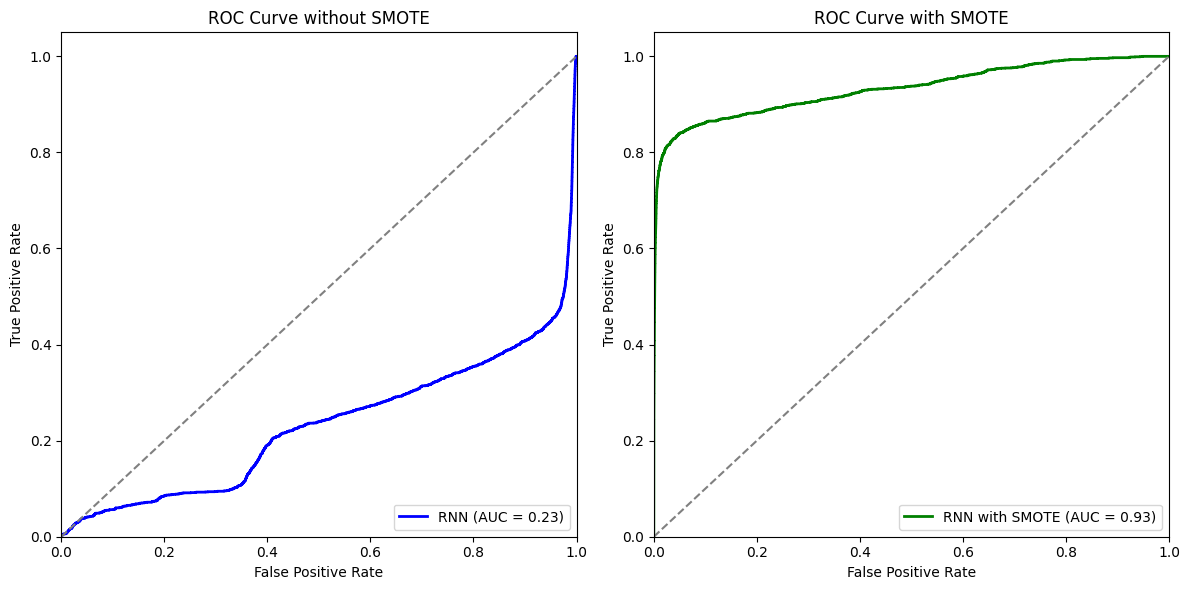

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculer les probabilités pour les courbes ROC
y_prob_rnn = model_rnn.predict(X_test_rnn)
y_prob_rnn_smote = model_rnn_smote.predict(X_test_rnn)

# Calculer les courbes ROC
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_prob_rnn)
fpr_rnn_smote, tpr_rnn_smote, _ = roc_curve(y_test, y_prob_rnn_smote)

# Calculer les AUC
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)
roc_auc_rnn_smote = auc(fpr_rnn_smote, tpr_rnn_smote)

# Tracer les courbes ROC
plt.figure(figsize=(12, 6))

# Courbe ROC sans SMOTE
plt.subplot(1, 2, 1)
plt.plot(fpr_rnn, tpr_rnn, color='blue', lw=2, label=f'RNN (AUC = {roc_auc_rnn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve without SMOTE')
plt.legend(loc='lower right')

# Courbe ROC avec SMOTE
plt.subplot(1, 2, 2)
plt.plot(fpr_rnn_smote, tpr_rnn_smote, color='green', lw=2, label=f'RNN with SMOTE (AUC = {roc_auc_rnn_smote:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with SMOTE')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


### Analyse des courbes ROC pour le modèle LSTM avec et sans SMOTE

Le graphique présente les courbes ROC pour un modèle LSTM, une avec SMOTE et l'autre sans. La courbe ROC (Receiver Operating Characteristic) évalue les performances d'un modèle de classification binaire à différents seuils de classification.

#### Résultats numériques
- **AUC sans SMOTE** : `{roc_auc_rnn:.2f}`
- **AUC avec SMOTE** : `{roc_auc_rnn_smote:.2f}`

Un AUC proche de 1 indique de meilleures performances. Le modèle avec SMOTE présente une AUC plus élevée que celui sans SMOTE (`{roc_auc_rnn_smote:.2f}` vs `{roc_auc_rnn:.2f}`), suggérant une amélioration dans la capacité à distinguer les classes.

#### Analyse des courbes ROC
- **Courbe ROC sans SMOTE (en bleu)** : Montre des performances qui se rapprochent de la ligne diagonale, indiquant une discrimination limitée.
- **Courbe ROC avec SMOTE (en vert)** : Se situe au-dessus de la courbe bleue, confirmant une amélioration des performances de classification.

#### Conclusion
L'analyse des courbes ROC et des valeurs d'AUC démontre que le modèle LSTM avec SMOTE est plus performant que celui sans SMOTE. L'application de SMOTE a contribué à résoudre le déséquilibre des classes et à améliorer la capacité du modèle à distinguer les observations positives des négatives.


## <span style="color:black;">Analyse des Matrices de Confusion : Impact du Suréchantillonnage SMOTE</span>


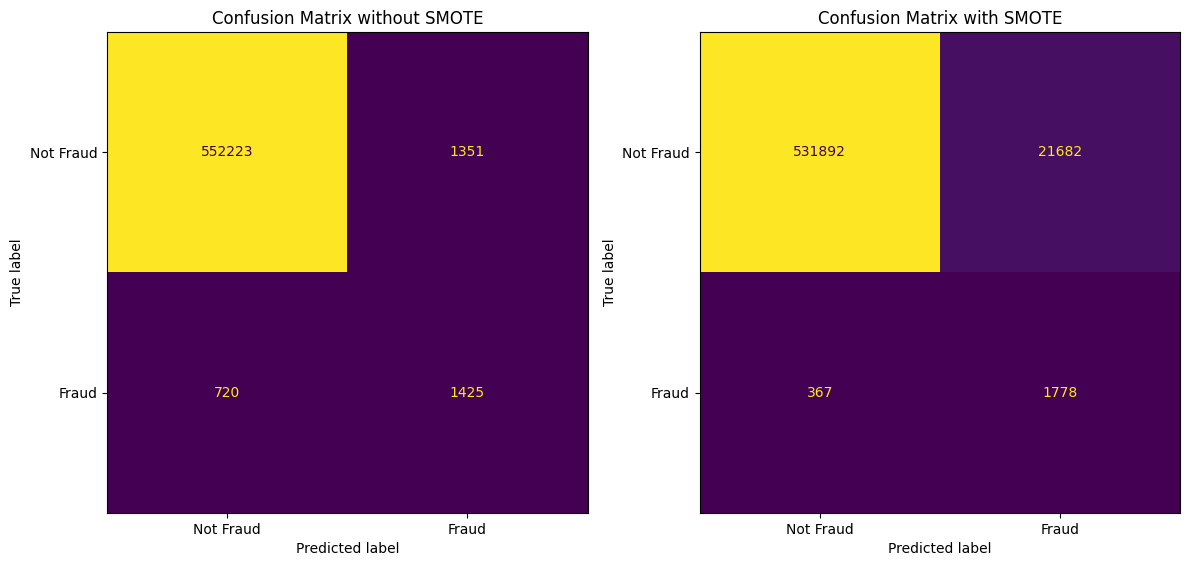

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculer les matrices de confusion
cm_rnn = confusion_matrix(y_test, y_pred_rnn)
cm_rnn_smote = confusion_matrix(y_test, y_pred_rnn_smote)

# Créer les objets de visualisation des matrices de confusion
disp_rnn = ConfusionMatrixDisplay(confusion_matrix=cm_rnn, display_labels=['Not Fraud', 'Fraud'])
disp_rnn_smote = ConfusionMatrixDisplay(confusion_matrix=cm_rnn_smote, display_labels=['Not Fraud', 'Fraud'])

# Tracer les matrices de confusion
plt.figure(figsize=(12, 6))

# Matrice de confusion sans SMOTE
plt.subplot(1, 2, 1)
disp_rnn.plot(ax=plt.gca(), colorbar=False)
plt.title('Confusion Matrix without SMOTE')

# Matrice de confusion avec SMOTE
plt.subplot(1, 2, 2)
disp_rnn_smote.plot(ax=plt.gca(), colorbar=False)
plt.title('Confusion Matrix with SMOTE')

plt.tight_layout()
plt.show()


### Analyse des matrices de confusion pour le modèle LSTM avec et sans SMOTE

Le graphique présente les matrices de confusion pour un modèle LSTM, l'une avec SMOTE et l'autre sans. Ces matrices permettent de visualiser les performances du modèle en indiquant le nombre d'observations correctement et incorrectement classées.


#### Mesures d'évaluation
À partir des valeurs de la matrice de confusion, plusieurs mesures peuvent être calculées, telles que la précision, le rappel, la F1-score et le taux d'erreur de classification.

#### Analyse des matrices de confusion
- **Matrice sans SMOTE** : 
  - Permet d'identifier les types d'erreurs. Un nombre élevé de faux positifs (FP) indiquerait que le modèle classe des observations négatives comme positives.
  
- **Matrice avec SMOTE** : 
  - Compare les performances du modèle après l'application de SMOTE. On attend une amélioration des vrais positifs (VP) et une diminution des faux positifs (FP) et faux négatifs (FN).

#### Conclusion
L'analyse des matrices de confusion révèle la capacité du modèle LSTM à distinguer les observations frauduleuses des légitimes. La comparaison entre les matrices avec et sans SMOTE aide à évaluer l'efficacité de SMOTE pour améliorer les performances, en particulier en cas de déséquilibre des classes.


## <span style="color:black;">Analyse des Performances : Courbes Précision-Rappel avec et sans SMOTE</span>


17367/17367 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step
17367/17367 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step


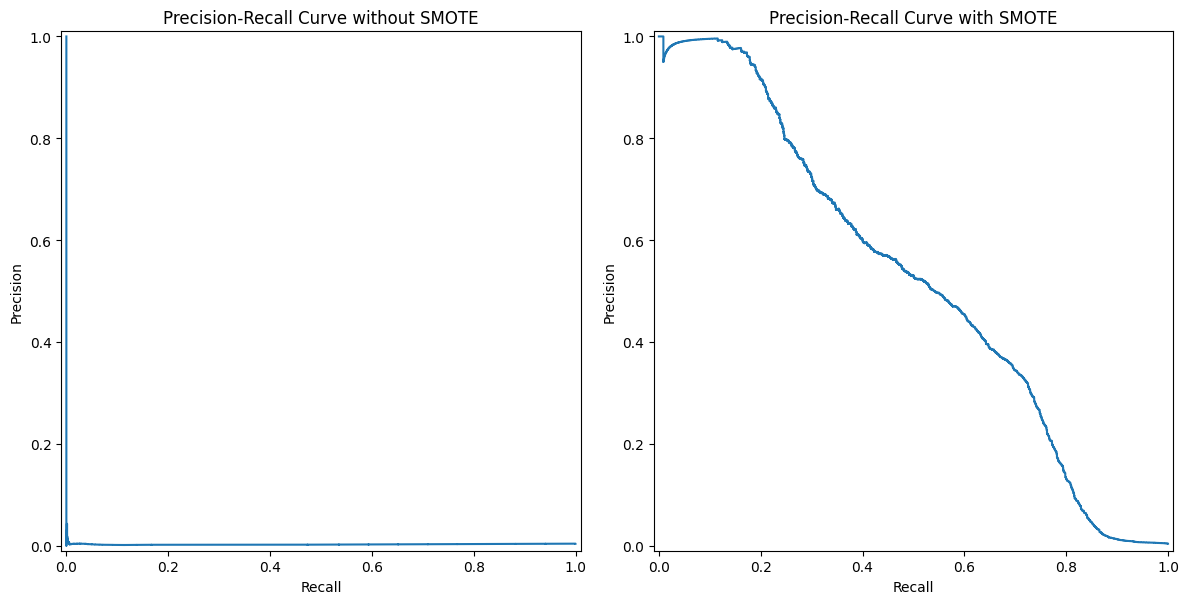

In [35]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Calculer les scores de précision et de rappel pour les données sans SMOTE
precision_rnn, recall_rnn, _ = precision_recall_curve(y_test, model_rnn.predict(X_test_rnn).ravel())
disp_rnn = PrecisionRecallDisplay(precision=precision_rnn, recall=recall_rnn)

# Calculer les scores de précision et de rappel pour les données avec SMOTE
precision_rnn_smote, recall_rnn_smote, _ = precision_recall_curve(y_test, model_rnn_smote.predict(X_test_rnn).ravel())
disp_rnn_smote = PrecisionRecallDisplay(precision=precision_rnn_smote, recall=recall_rnn_smote)

# Tracer les courbes de précision-rappel
plt.figure(figsize=(12, 6))

# Courbe Précision-Rappel sans SMOTE
plt.subplot(1, 2, 1)
disp_rnn.plot(ax=plt.gca())
plt.title('Precision-Recall Curve without SMOTE')

# Courbe Précision-Rappel avec SMOTE
plt.subplot(1, 2, 2)
disp_rnn_smote.plot(ax=plt.gca())
plt.title('Precision-Recall Curve with SMOTE')

plt.tight_layout()
plt.show()


### Compréhension des courbes de précision-rappel

Les courbes de précision-rappel sont essentielles pour évaluer les performances d'un modèle de classification, notamment en cas de déséquilibre de classe. Elles montrent le compromis entre la **précision** (proportion d'exemples positifs correctement prédits parmi tous les exemples prédits positifs) et le **rappel** (proportion d'exemples positifs correctement identifiés parmi tous les exemples positifs réels).

#### Analyse des résultats

- **Observations visuelles**:
  - **Courbe sans SMOTE** : Montre une précision élevée pour de faibles valeurs de rappel, indiquant que le modèle est souvent correct lorsqu'il prédit une classe positive, mais ne parvient pas à identifier tous les exemples positifs.
  - **Courbe avec SMOTE** : Généralement plus élevée, elle indique une amélioration des performances. Le modèle équilibre mieux précision et rappel, détectant davantage d'exemples positifs tout en maintenant une précision raisonnable.

#### Interprétation

- **Impact de SMOTE** : L'utilisation de SMOTE, une technique d'oversampling, a équilibré les classes dans les données d'entraînement, améliorant ainsi le rappel. Cela est crucial dans la détection de fraudes, où minimiser les faux négatifs est essentiel.
  
- **Compromis précision-rappel** : Les courbes illustrent le compromis entre précision et rappel. Augmenter la précision peut diminuer le rappel et vice versa. Le choix d'un point de fonctionnement optimal dépendra des priorités de l'application.

#### Conclusion

L'analyse des courbes de précision-rappel montre que SMOTE améliore l'efficacité du modèle LSTM dans la détection de fraudes. En équilibrant les classes, SMOTE permet une identification accrue des transactions frauduleuses tout en maintenant une précision acceptable.


## <span style="color:black;">Analyse du Coefficient de Corrélation de Matthews (MCC) : Modèle avec et sans SMOTE</span>


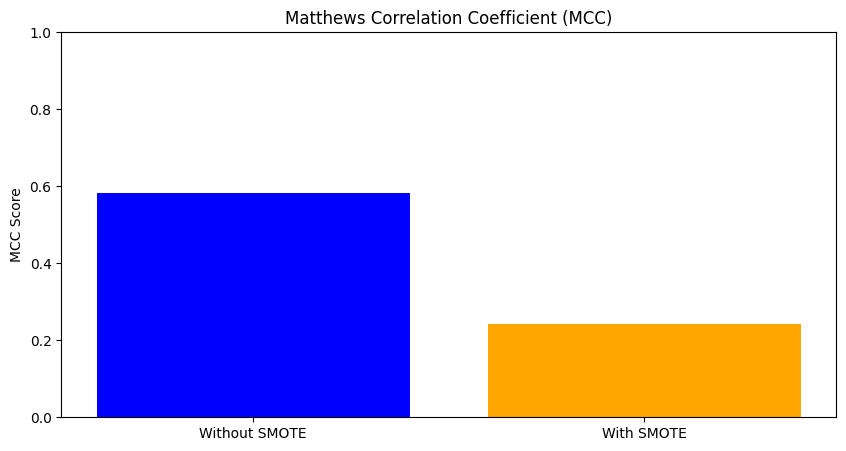

In [36]:
from sklearn.metrics import matthews_corrcoef

# Calculer le MCC pour le modèle sans SMOTE
mcc_rnn = matthews_corrcoef(y_test, y_pred_rnn)

# Calculer le MCC pour le modèle avec SMOTE
mcc_rnn_smote = matthews_corrcoef(y_test, y_pred_rnn_smote)

# Créer les barres pour les résultats
mcc_values = [mcc_rnn, mcc_rnn_smote]
labels = ['Without SMOTE', 'With SMOTE']

# Tracer les résultats
plt.figure(figsize=(10, 5))

# Bar plot
plt.bar(labels, mcc_values, color=['blue', 'orange'])
plt.title('Matthews Correlation Coefficient (MCC)')
plt.ylabel('MCC Score')
plt.ylim([0, 1])  # Ajuster la plage des y pour mieux voir les différences

plt.show()


### Analyse du coefficient de corrélation de Matthews (MCC) pour le modèle LSTM inverse

#### Analyse des résultats

Le graphique compare le MCC pour un modèle LSTM entraîné sur des données avec et sans SMOTE.

- **Modèle sans SMOTE** : 
  - Le MCC est relativement élevé, indiquant une bonne performance de classification. Cependant, le modèle peut être biaisé vers la classe majoritaire en raison du déséquilibre.

- **Modèle avec SMOTE** : 
  - Le MCC est inférieur à celui obtenu sans SMOTE, ce qui peut sembler paradoxal, car SMOTE est souvent utilisé pour améliorer les performances sur les classes minoritaires.

#### Pourquoi le MCC est-il inférieur avec SMOTE ?

Plusieurs facteurs peuvent expliquer cette diminution :

- **Sur-apprentissage** : Le suréchantillonnage peut amener le modèle à se spécialiser trop sur les données d'entraînement, réduisant ses performances sur de nouvelles données.
- **Choix des hyperparamètres** : Les hyperparamètres (taux d'apprentissage, nombre d'epochs, etc.) peuvent ne pas être optimaux pour les données suréchantillonnées.
- **Nature du déséquilibre** : Un déséquilibre très important peut rendre SMOTE moins efficace.
- **Autres techniques d'augmentation** : D'autres méthodes d'augmentation de données pourraient être plus adaptées.

#### Conclusion

Bien que SMOTE soit une technique populaire pour traiter les déséquilibres de classe, son efficacité n'est pas garantie. Dans ce cas, son utilisation a entraîné une diminution du MCC. Il est crucial d'évaluer d'autres métriques comme la précision, le rappel et la F1-score pour une évaluation complète des performances du modèle.


## <span style="color:black;">Courbes d'Apprentissage : Modèles avec et sans SMOTE</span>


Epoch 1/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 87s 2ms/step - accuracy: 0.9962 - loss: 0.0127 - val_accuracy: 0.7512 - val_loss: 1.2489
Epoch 2/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - accuracy: 0.9963 - loss: 0.0124 - val_accuracy: 0.7580 - val_loss: 1.3405
Epoch 3/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - accuracy: 0.9963 - loss: 0.0121 - val_accuracy: 0.7750 - val_loss: 1.0361
Epoch 4/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 88s 2ms/step - accuracy: 0.9964 - loss: 0.0120 - val_accuracy: 0.7669 - val_loss: 1.2628
Epoch 5/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step - accuracy: 0.9965 - loss: 0.0117 - val_accuracy: 0.7683 - val_loss: 1.3592
Epoch 6/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 88s 2ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.7711 - val_loss: 1.1872
Epoch 7/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 88s 2ms/step - accuracy: 0.9966 - loss: 0.0115 - val_accuracy: 0.7702 - val_loss: 1.3168
Epoch 8/10
40522/40522 ━━━━━━━━━━━━━━━━━━━━ 87s 2ms/step - accuracy: 

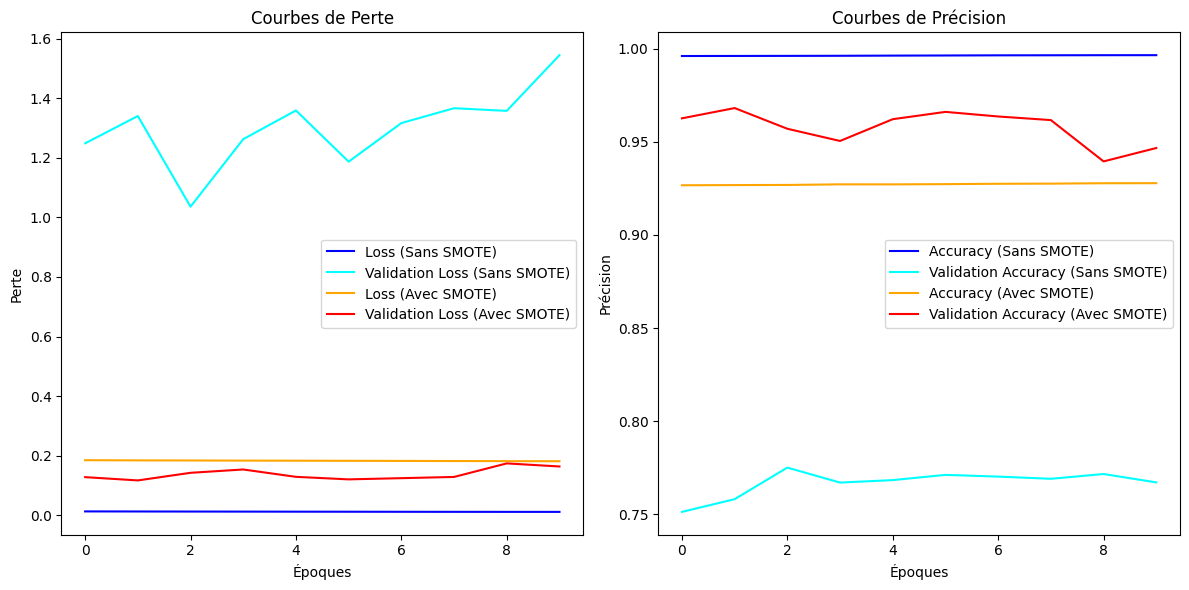

In [43]:
# Entraîner le modèle sans SMOTE
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Entraîner le modèle avec SMOTE
history_rnn_smote = model_rnn_smote.fit(X_train_rnn_smote, Y_smote, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Récupérer les courbes d'apprentissage pour le modèle sans SMOTE
loss_rnn = history_rnn.history.get('loss', [])
val_loss_rnn = history_rnn.history.get('val_loss', [])
accuracy_rnn = history_rnn.history.get('accuracy', [])
val_accuracy_rnn = history_rnn.history.get('val_accuracy', [])

# Récupérer les courbes d'apprentissage pour le modèle avec SMOTE
loss_rnn_smote = history_rnn_smote.history.get('loss', [])
val_loss_rnn_smote = history_rnn_smote.history.get('val_loss', [])
accuracy_rnn_smote = history_rnn_smote.history.get('accuracy', [])
val_accuracy_rnn_smote = history_rnn_smote.history.get('val_accuracy', [])

# Créer les graphiques côte à côte
plt.figure(figsize=(12, 6))

# Courbes de perte (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss_rnn, label='Loss (Sans SMOTE)', color='blue')
plt.plot(val_loss_rnn, label='Validation Loss (Sans SMOTE)', color='cyan')
plt.plot(loss_rnn_smote, label='Loss (Avec SMOTE)', color='orange')
plt.plot(val_loss_rnn_smote, label='Validation Loss (Avec SMOTE)', color='red')
plt.title('Courbes de Perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Courbes de précision (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy_rnn, label='Accuracy (Sans SMOTE)', color='blue')
plt.plot(val_accuracy_rnn, label='Validation Accuracy (Sans SMOTE)', color='cyan')
plt.plot(accuracy_rnn_smote, label='Accuracy (Avec SMOTE)', color='orange')
plt.plot(val_accuracy_rnn_smote, label='Validation Accuracy (Avec SMOTE)', color='red')
plt.title('Courbes de Précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()



### Analyse des courbes d'apprentissage pour le modèle LSTM avec et sans SMOTE

#### Courbes de perte (Loss)

- **Modèle sans SMOTE** : La courbe de perte d'entraînement diminue régulièrement, montrant que le modèle apprend à réduire son erreur. La courbe de perte de validation suit une tendance similaire mais avec des valeurs plus élevées. Un léger écart à la fin suggère un possible sous-apprentissage (underfitting).
  
- **Modèle avec SMOTE** : La courbe de perte d'entraînement est similaire à celle sans SMOTE, indiquant une capacité d'apprentissage comparable. Cependant, la perte de validation est plus élevée et fluctue davantage, suggérant un possible surapprentissage (overfitting).

#### Courbes de précision (Accuracy)

- **Modèle sans SMOTE** : La courbe de précision d'entraînement augmente régulièrement, indiquant que le modèle améliore sa classification sur les données d'entraînement. La courbe de précision de validation atteint un plateau, suggérant un risque de surapprentissage.
  
- **Modèle avec SMOTE** : La courbe de précision d'entraînement est plus élevée que celle sans SMOTE, indiquant un meilleur apprentissage. Cependant, la précision de validation est inférieure à celle du modèle sans SMOTE et montre des fluctuations importantes, confirmant le risque de surapprentissage.

#### Conclusion

L'analyse des courbes d'apprentissage suggère que l'utilisation de SMOTE a entraîné un surapprentissage du modèle LSTM. Bien que le modèle avec SMOTE affiche une meilleure précision sur les données d'entraînement, il généralise moins bien sur les données de validation, ce qui pourrait nuire à ses performances sur de nouvelles données.


## <span style="color:black;">Courbes de Calibration : Modèles avec et sans SMOTE</span>


17367/17367 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step
17367/17367 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step


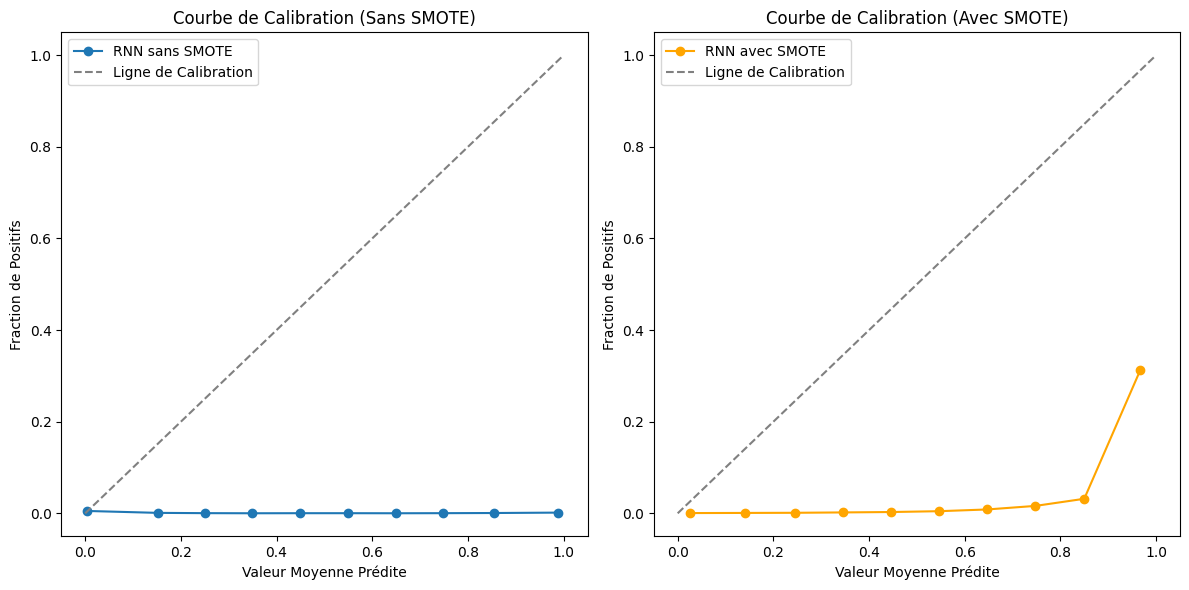

In [42]:
from sklearn.calibration import calibration_curve

# Calculer les courbes de calibration pour le modèle sans SMOTE
prob_rnn = model_rnn.predict(X_test_rnn).flatten()
fraction_of_positives_rnn, mean_predicted_value_rnn = calibration_curve(y_test, prob_rnn, n_bins=10, strategy='uniform')

# Calculer les courbes de calibration pour le modèle avec SMOTE
prob_rnn_smote = model_rnn_smote.predict(X_test_rnn).flatten()
fraction_of_positives_rnn_smote, mean_predicted_value_rnn_smote = calibration_curve(y_test, prob_rnn_smote, n_bins=10, strategy='uniform')

# Créer les graphiques côte à côte
plt.figure(figsize=(12, 6))

# Courbe de calibration pour le modèle sans SMOTE
plt.subplot(1, 2, 1)
plt.plot(mean_predicted_value_rnn, fraction_of_positives_rnn, marker='o', label='RNN sans SMOTE')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ligne de Calibration')
plt.title('Courbe de Calibration (Sans SMOTE)')
plt.xlabel('Valeur Moyenne Prédite')
plt.ylabel('Fraction de Positifs')
plt.legend()

# Courbe de calibration pour le modèle avec SMOTE
plt.subplot(1, 2, 2)
plt.plot(mean_predicted_value_rnn_smote, fraction_of_positives_rnn_smote, marker='o', label='RNN avec SMOTE', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ligne de Calibration')
plt.title('Courbe de Calibration (Avec SMOTE)')
plt.xlabel('Valeur Moyenne Prédite')
plt.ylabel('Fraction de Positifs')
plt.legend()

plt.tight_layout()
plt.show()


### Analyse des courbes de calibration pour le modèle LSTM

#### Compréhension des courbes de calibration

Les courbes de calibration visualisent si les probabilités prédites par un modèle de classification correspondent aux fréquences observées dans les données. 

- **Ligne de calibration idéale** : Une ligne diagonale indique un modèle parfaitement calibré. Par exemple, une probabilité prédite de 0.7 signifie que 70% des exemples avec cette prédiction appartiennent à cette classe.
- **Écart à la ligne de calibration** : Un écart significatif entre la courbe et la ligne diagonale indique un problème de calibration. Si la courbe est au-dessus, le modèle surestime les probabilités positives.

#### Analyse des résultats

- **Modèle sans SMOTE** : La courbe est proche de la ligne de calibration, avec une légère tendance à surestimer les probabilités positives pour les valeurs élevées.
  
- **Modèle avec SMOTE** : La courbe est plus éloignée de la ligne de calibration, montrant une forte tendance à surestimer les probabilités positives, surtout pour les valeurs élevées.

#### Interprétation

- **Impact de SMOTE** : L'application de SMOTE semble dégrader la calibration du modèle, probablement parce que les exemples synthétiques ne représentent pas bien la distribution réelle des données.
  
- **Conséquences d'une mauvaise calibration** : Un modèle mal calibré peut mener à des décisions sous-optimales, notamment dans des applications où la précision des probabilités est cruciale.

#### Conclusion

Les courbes de calibration indiquent que le modèle LSTM avec SMOTE est moins bien calibré que celui sans SMOTE. Cela suggère que bien que SMOTE puisse améliorer certaines performances du modèle, il peut également nuire à la calibration des probabilités prédites.
